In [113]:
import pandas as pd 
import numpy as np

In [114]:
data=pd.read_csv("D:\CreditCardFraud\Credit Card.csv")

In [115]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [116]:

data.describe().T

,count,mean,std,min,25%,50%,75%,max
step,1048575.0,2.696617e+01,1.562325e+01,1.0,15.000,20.00,39.000,95.0
amount,1048575.0,1.586670e+05,2.649409e+05,0.1,12149.065,76343.33,213761.890,10000000.0
oldbalanceOrg,1048575.0,8.740095e+05,2.971751e+06,0.0,0.000,16002.00,136642.020,38900000.0
newbalanceOrig,1048575.0,8.938089e+05,3.008271e+06,0.0,0.000,0.00,174599.990,38900000.0
oldbalanceDest,1048575.0,9.781600e+05,2.296780e+06,0.0,0.000,126377.21,915923.475,42100000.0
newbalanceDest,1048575.0,1.114198e+06,2.416593e+06,0.0,0.000,218260.36,1149807.510,42200000.0
isFraud,1048575.0,1.089097e-03,3.298351e-02,0.0,0.000,0.00,0.000,1.0
isFlaggedFraud,1048575.0,0.000000e+00,0.000000e+00,0.0,0.000,0.00,0.000,0.0


In [117]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [118]:
data.columns


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [119]:
type = data["type"].value_counts()
transactions = type.index
quantity = type.values

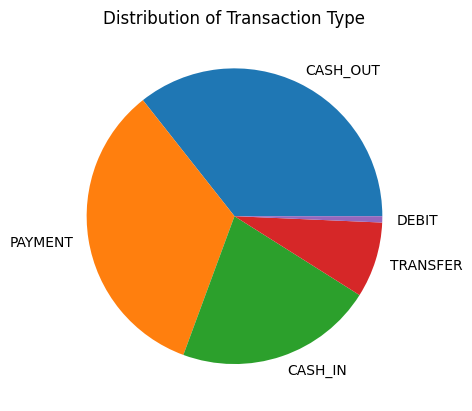

In [120]:
import matplotlib.pyplot as plt 
plt.pie(quantity,labels=transactions)
plt.title("Distribution of Transaction Type")
plt.show()

In [121]:
# Checking correlation
correlation = data.corr()
correlation["isFraud"].sort_values(ascending=False)

C:\Users\AHMED SAYED\AppData\Local\Temp\ipykernel_41352\3534501912.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


isFraud           1.000000
amount            0.128862
step              0.045030
oldbalanceOrg     0.003829
newbalanceDest   -0.000495
oldbalanceDest   -0.007552
newbalanceOrig   -0.009438
isFlaggedFraud         NaN
Name: isFraud, dtype: float64

C:\Users\AHMED SAYED\AppData\Local\Temp\ipykernel_41352\3034101994.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


<AxesSubplot: >

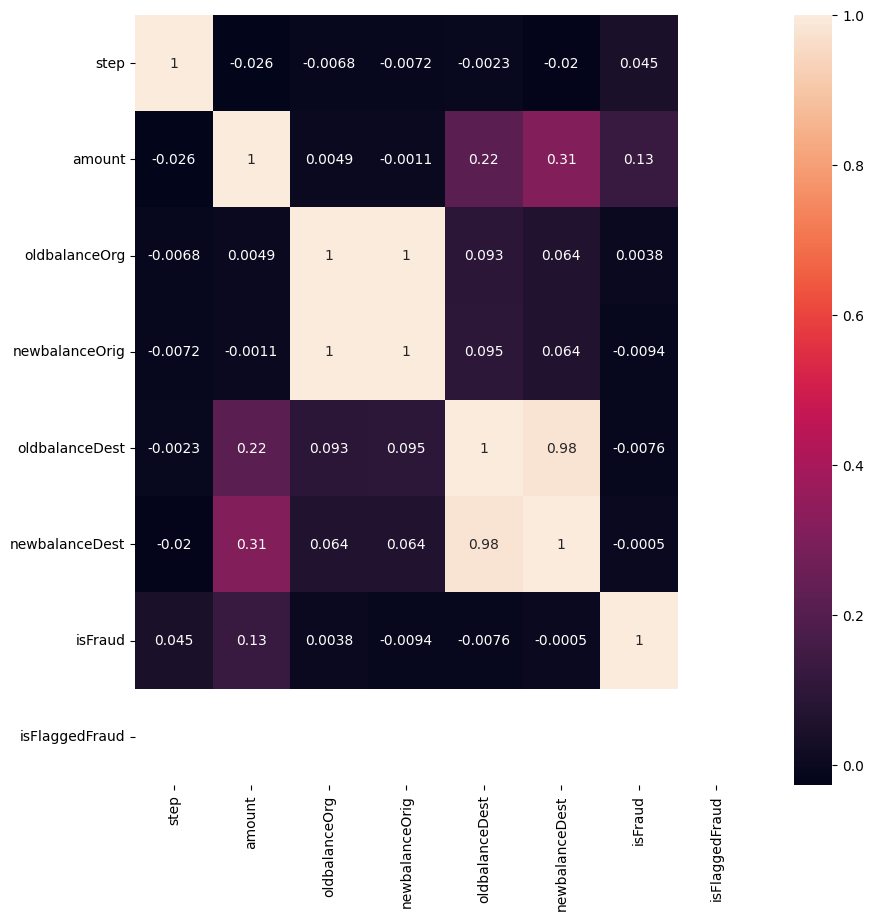

In [122]:
import seaborn as sns 
corr=data.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True)

Now let’s transform the categorical features into numerical. Here I will also transform the values of the isFraud column into No Fraud and Fraud labels to have a better understanding of the output:

In [123]:
data['type'].value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

CASH_OUT --------> 1

PAYMENT  --------> 2  

CASH_IN  --------> 3   

TRANSFER --------> 4    

DEBIT    --------> 5

In [124]:
data['type']=data['type'].map({'CASH_OUT':1,'PAYMENT':2,
                               'CASH_IN':3,'TRANSFER':4,
                               'DEBIT':5})

In [125]:
data['type'].value_counts()

1    373641
2    353873
3    227130
4     86753
5      7178
Name: type, dtype: int64

In [126]:
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})

data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0


Now let’s train a classification model to classify fraud and non-fraud transactions. 

Before training the model, I will split the data into training and test sets:

In [127]:
# splitting the data
from sklearn.model_selection import train_test_split
x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

In [128]:
# training a machine learning model
from sklearn.linear_model import LogisticRegression
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=43)
model = LogisticRegression()
model.fit(xtrain, ytrain)


c:\Users\AHMED SAYED\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [129]:
model.score(xtest, ytest)

0.9997091290561

In [130]:
# prediction
#features = [type, amount, oldbalanceOrg, newbalanceOrig]

features = np.array([[2,9839.64, 170136.0, 160296.36]]) #[TRANSFER,9000.60,900.60,0.0]
print(model.predict(features))

['No Fraud']
